In [0]:
#-----------------------------------------------------------------
# Pramodkumar Gupta
# 5-Jan-2020
# Bank Customer Churn Modelling
#-----------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
X=df.iloc[:,3:13]
y=df.iloc[:,-1]

In [5]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# Handling Categorical Variables

# Checking different values for Geography
X["Geography"].value_counts().sort_index()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
# Checking different values for Gender
X["Gender"].value_counts().sort_index()

Female    4543
Male      5457
Name: Gender, dtype: int64

In [0]:
# Handling Categorical attribute using get dummies

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [10]:
geography.head(5)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [0]:
# Concate these columns with Dataframes
X=pd.concat([X, geography, gender],axis=1)


In [0]:
# Dropping old Categorical columns
X.drop(['Geography','Gender'],axis=1,inplace=True)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [0]:
# Split dataset into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

Implementing ANN 

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU, PReLU, LeakyReLU
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
classifier=Sequential()

In [17]:
classifier.add(Dense(units=6,activation="relu",kernel_initializer="he_uniform",input_dim=11))

In [0]:
classifier.add(Dense(units=6,activation="relu",kernel_initializer="he_uniform"))

In [0]:
classifier.add(Dense(units=6,activation="relu",kernel_initializer="he_uniform"))

In [20]:
classifier.add(Dense(units=1,activation="sigmoid",kernel_initializer="glorot_normal"))

In [21]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 5359 samples, validate on 2641 samples
Epoch 1/100





5359/5359 [==============================] - 1s 240us/step - loss: 0.5185 - acc: 0.7953 - val_loss: 0.4815 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 168us/step - loss: 0.4588 - acc: 0.7962 - val_loss: 0.4524 - val_acc: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 169us/step - loss: 0.4378 - acc: 0.7994 - val_loss: 0.4422 - val_acc: 0.7993
Epoch 4/100
5359/5359 [==============================] - 1s 169us/step - loss: 0.4286 - acc: 0.8087 - val_loss: 0.4360 - val_acc: 0.8054
Epoch 5/100
5359/5359 [==============================] - 1s 172us/step - loss: 0.4225 - acc: 0.8134 - val_loss: 0.4327 - val_acc: 0.8073
Epoch 6/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.4176 - acc: 0.8192 - val_loss: 0.4297 - val_acc: 0.8114
Epoch 7/100
5359/5359 [==============================] - 1s 167us/step - loss: 0.4135 - acc: 0.8235 - val_loss: 0.4295 - va

In [23]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("\nAccuracy: {}".format(score))

Confusion Matrix: 
[[1522   73]
 [ 201  204]]

Accuracy: 0.863


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


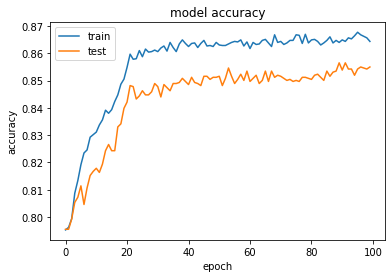

In [24]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

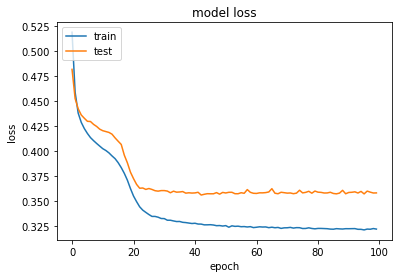

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()